# Common Conversion Point Stack of a Single Station

The following notebook carries you through how to get from 
a set of receiver functions of a single station to a 3D 
common conversion point (CCP) stack. 
As an example as in the previous notebooks,
we again use IU-HRV as example station. 

---
***Note***:

It is assumed here that you have successfully computed the
receiver functions from the `00_DataCollection.ipynb`.

---

## Load the Receiver functions

So, first load the receiver function into a `RFStream`.

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/RF/P/IU/HRV/*.sac")

# Check traces
print("Number of loaded RFs: ", len(rfst))
rfst[0].plot()

Exception: No file matching file pattern: database/RF/P/IU/HRV/*.sac

## Compute Common Conversion Point Stack

This is similar to the single station stacks.


In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from pyglimer.ccp import init_ccp
import os
import numpy as np

# Define the location of the database
databaselocation = "database"
inter_bin_distance = 0.1
velocity_model = 'iasp91.dat'

ccp_init_dict = {
    "binrad": np.cos(np.radians(30)),
    "phase": 'P',
    "statloc": os.path.join(databaselocation, "stations"),
    "preproloc": os.path.join(databaselocation, "preprocessed"),
    "rfloc": os.path.join(databaselocation, "RF"),
    "network": "IU",
    "station": "HRV",
    "compute_stack": True,
    "save": 'ccp_IU_HRV.pkl'
}

# Initialize bins
ccpstack = init_ccp(inter_bin_distance, 
                    velocity_model, 
                    **ccp_init_dict)

Finalizing the CCPStack

In [5]:
ccpstack.conclude_ccp()

### Plot bins

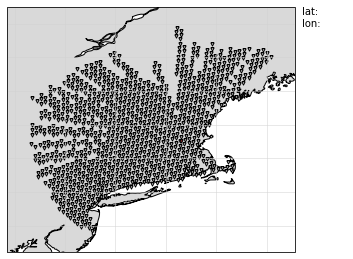

In [22]:
# Plot bins
# %matplotlib widget
import matplotlib.pyplot as plt
plt.ion()
ccpstack.plot_bins()

### Read stack from file and interpolate volume

In [ ]:
import numpy as np
from pyglimer.ccp.ccp import read_ccp

ccpstack = read_ccp(filename='ccp_IU_HRV.pkl', folder='output/ccps', fmt=None)

lats = np.arange(41, 43.5, 0.05)
lons = np.arange(-72.7, -69.5, 0.05)
z = np.linspace(-10, 200, 211)


### Use the `CCPStack` object to compute volume

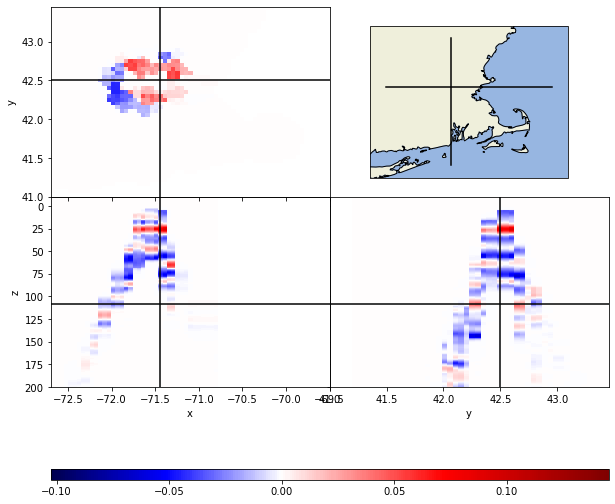

In [5]:
from pyglimer.plot.plot_volume import VolumePlot

vplot = ccpstack.plot_volume_sections(lons, lats, z, lonsl=-71.45, latsl=42.5, zsl=108,
                                      minillum=15)


## Compute a "dirty" global CCP stack

In short, we are assuming that latitudes and longitudes are cartesian entities, with a small correction for the area of each bin that depends on the change in metric width of a degree of longitude as a function of latitude.

In [3]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/RF/P/IU/HRV/*.sac")

AttributeError: type